Первым шагом загружаем данные из CSV-файла и разделяем их на два вектора: x (скидка) и y (прибыль).

In [34]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

uploaded = files.upload()
data = np.genfromtxt('data2.csv', delimiter=';', skip_header=1)
x = data[:, 0]
y = data[:, 1]
n = len(x)
print(f"Загружено {n} точек данных")
print("Первые 5 строк:")
print(data[:5])

Saving data2.csv to data2 (2).csv
Загружено 25 точек данных
Первые 5 строк:
[[ 0.2        -6.57266488]
 [ 0.4        -5.37046782]
 [ 0.6        -3.15858504]
 [ 0.8        -1.48270657]
 [ 1.         -0.12384439]]


Формирование СЛУ для полинома 2-й степени

In [37]:
selected_points_quad = [0, n//2, -1]
selected_x_quad = x[selected_points_quad]
selected_y_quad = y[selected_points_quad]

print("Точки для квадратичного полинома:")
for i in range(3):
    print(f"  Точка {i+1}: x={selected_x_quad[i]:.2f}, y={selected_y_quad[i]:.2f}")

A_quad = np.array([
    [selected_x_quad[0]**2, selected_x_quad[0], 1],
    [selected_x_quad[1]**2, selected_x_quad[1], 1],
    [selected_x_quad[2]**2, selected_x_quad[2], 1]
])

Точки для квадратичного полинома:
  Точка 1: x=0.20, y=-6.57
  Точка 2: x=2.60, y=17.27
  Точка 3: x=5.00, y=25.24


2. Решение системы линейных уравнений (СЛУ)

In [39]:
coefficients_quad = solve(A_quad, selected_y_quad)
a2, a1, a0 = coefficients_quad
print(f"Коэффициенты квадратичного полинома:")
print(f"a2 = {a2:.6f}")
print(f"a1 = {a1:.6f}")
print(f"a0 = {a0:.6f}")

Коэффициенты квадратичного полинома:
a2 = -1.377459
a1 = 13.790260
a0 = -9.275619


3. Вектор значений построенного полинома

In [40]:
y_pred_quad = a2*x**2 + a1*x + a0
print("Первые 5 значений полинома:")
print(y_pred_quad[:5])

Первые 5 значений полинома:
[-6.57266488 -3.97990798 -1.49734781  0.87501564  3.13718236]


4. Построение графиков

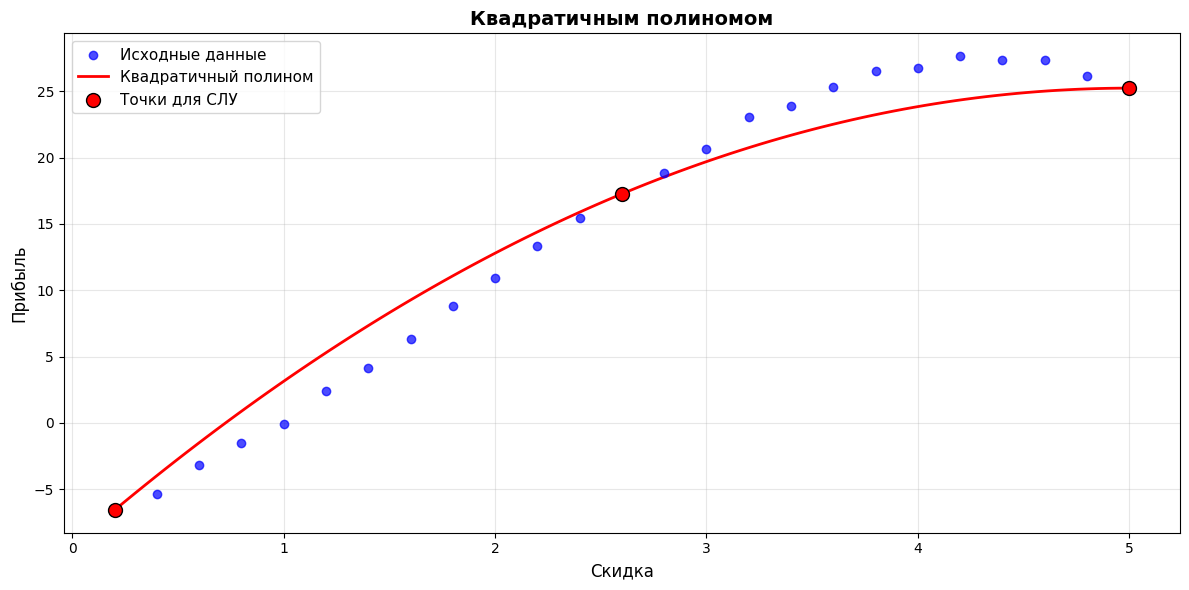

In [42]:
plt.figure(figsize=(12, 6))

plt.scatter(x, y, alpha=0.7, label='Исходные данные', color='blue', zorder=3)

x_smooth = np.linspace(x.min(), x.max(), 100)
y_smooth_quad = a2*x_smooth**2 + a1*x_smooth + a0
plt.plot(x_smooth, y_smooth_quad, color='red', linewidth=2,
         label=f'Квадратичный полином')

plt.scatter(selected_x_quad, selected_y_quad, color='red', s=100,
           zorder=5, edgecolors='black', label='Точки для СЛУ')

plt.xlabel('Скидка', fontsize=12)
plt.ylabel('Прибыль', fontsize=12)
plt.title('Квадратичным полиномом', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

5. Вычисление квадратичного отклонения RSS

In [43]:
RSS_quad = np.sum((y - y_pred_quad)**2)
print(f"Квадратичное отклонение (RSS) для полинома 2-й степени: {RSS_quad:.6f}")

Квадратичное отклонение (RSS) для полинома 2-й степени: 120.787526


6. Повторение шагов 1-5 для полинома 3-й степени

6.1. Выбор 4 точек:

In [44]:
selected_points_cubic = [0, n//3, 2*n//3, -1]
selected_x_cubic = x[selected_points_cubic]
selected_y_cubic = y[selected_points_cubic]

print("Точки для кубического полинома:")
for i in range(4):
    print(f"  Точка {i+1}: x={selected_x_cubic[i]:.2f}, y={selected_y_cubic[i]:.2f}")

Точки для кубического полинома:
  Точка 1: x=0.20, y=-6.57
  Точка 2: x=1.80, y=8.82
  Точка 3: x=3.40, y=23.92
  Точка 4: x=5.00, y=25.24


6.2. Формирование и решение СЛУ:

In [46]:
A_cubic = np.array([
    [selected_x_cubic[0]**3, selected_x_cubic[0]**2, selected_x_cubic[0], 1],
    [selected_x_cubic[1]**3, selected_x_cubic[1]**2, selected_x_cubic[1], 1],
    [selected_x_cubic[2]**3, selected_x_cubic[2]**2, selected_x_cubic[2], 1],
    [selected_x_cubic[3]**3, selected_x_cubic[3]**2, selected_x_cubic[3], 1]
])

coefficients_cubic = solve(A_cubic, selected_y_cubic)
a3, a2_c, a1_c, a0_c = coefficients_cubic

print(f"Коэффициенты кубического полинома:")
print(f"a3 = {a3:.6f}")
print(f"a2 = {a2_c:.6f}")
print(f"a1 = {a1_c:.6f}")
print(f"a0 = {a0_c:.6f}")

Коэффициенты кубического полинома:
a3 = -0.548543
a2 = 2.903934
a1 = 5.811065
a0 = -7.846647


6.3. Вектор значений:

In [47]:
y_pred_cubic = a3*x**3 + a2_c*x**2 + a1_c*x + a0_c

6.4. График:

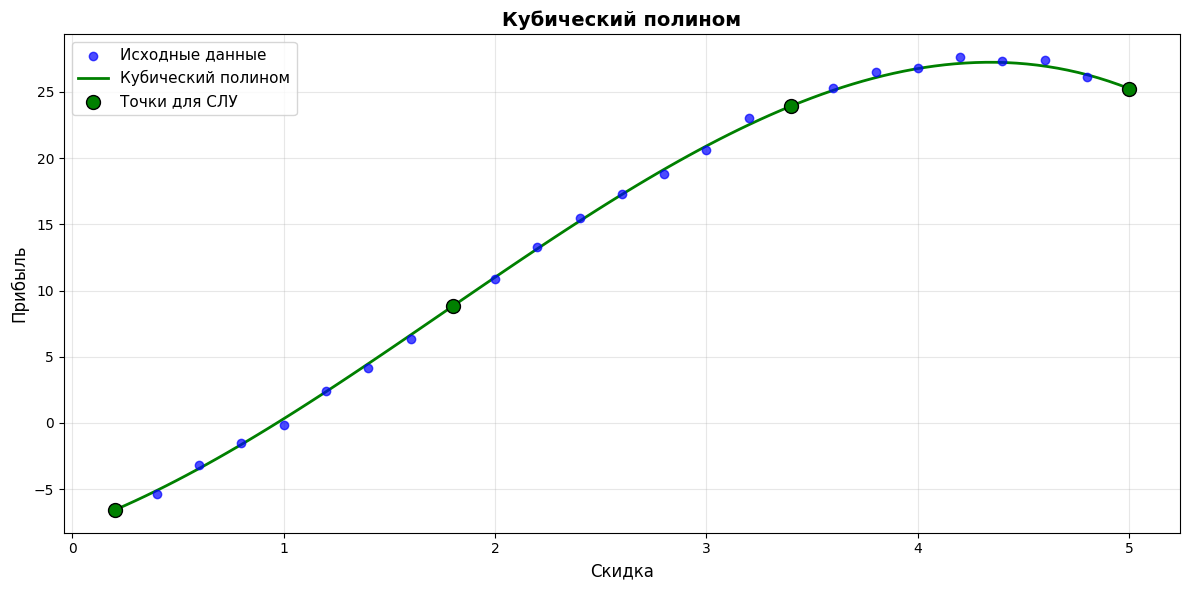

In [50]:
plt.figure(figsize=(12, 6))

plt.scatter(x, y, alpha=0.7, label='Исходные данные', color='blue', zorder=3)

x_smooth = np.linspace(x.min(), x.max(), 100)
y_smooth_cubic = a3*x_smooth**3 + a2_c*x_smooth**2 + a1_c*x_smooth + a0_c
plt.plot(x_smooth, y_smooth_cubic, color='green', linewidth=2,
         label=f'Кубический полином')

plt.scatter(selected_x_cubic, selected_y_cubic, color='green', s=100,
           zorder=5, edgecolors='black', label='Точки для СЛУ')

plt.xlabel('Скидка', fontsize=12)
plt.ylabel('Прибыль', fontsize=12)
plt.title('Кубический полином', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

6.5. Вычисление RSS:

In [51]:
RSS_cubic = np.sum((y - y_pred_cubic)**2)
print(f"Квадратичное отклонение (RSS) для полинома 3-й степени: {RSS_cubic:.6f}")

Квадратичное отклонение (RSS) для полинома 3-й степени: 1.878351


8. Выбор лучшего варианта и прогноз

8.1. Сравнение всех вариантов:

In [59]:
x_new = np.array([6.0, 8.0])

if RSS_quad < RSS_cubic:
    print(f"\nЛучшая модель: квадратичный полином (RSS = {RSS_quad:.4f})")
    vector_of_values_new = a2*x_new**2 + a1*x_new + a0
else:
    print(f"\nЛучшийая модель: кубический полином (RSS = {RSS_cubic:.4f})")
    vector_of_values_new = a3*x_new**3 + a2_c*x_new**2 + a1_c*x_new + a0_c

print(f"Прогноз:")
for i in range(2):
    print(f"Скидка {x_new[i]}%: прибыль = {vector_of_values_new[i]:.2f}")


Лучшийая модель: кубический полином (RSS = 1.8784)
Прогноз:
Скидка 6.0%: прибыль = 13.08
Скидка 8.0%: прибыль = -56.36
